In [127]:
# remember to load the environment first by running `conda activate colombia-python2`
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
from mpl_toolkits.basemap import Basemap
%matplotlib inline


In [120]:
#These lat and longs were looked up online, the cities that samples came from are known from the surveillance data.
city_lat_long_dict = {
    'cali':{'latitude': 3.395397, 'longitude': -76.6657535},
    'monteria':{'latitude': 8.7606317, 'longitude': -75.9169898},
    'ibague':{'latitude': 4.4788663, 'longitude': -75.5238119},
    'belen_de_umbria':{'latitude': 5.2009136, 'longitude': -75.873638},
    'pitalito':{'latitude': 1.8530233, 'longitude': -76.0724286},
                     }

In [122]:
# turn the lats and longs into simple lists for matplotlib plotting
lats = [city_lat_long_dict[key]['latitude'] for key in city_lat_long_dict.keys()]
longs = [city_lat_long_dict[key]['longitude'] for key in city_lat_long_dict.keys()]
print lats
print longs

[3.395397, 1.8530233, 8.7606317, 5.2009136, 4.4788663]
[-76.6657535, -76.0724286, -75.9169898, -75.873638, -75.5238119]


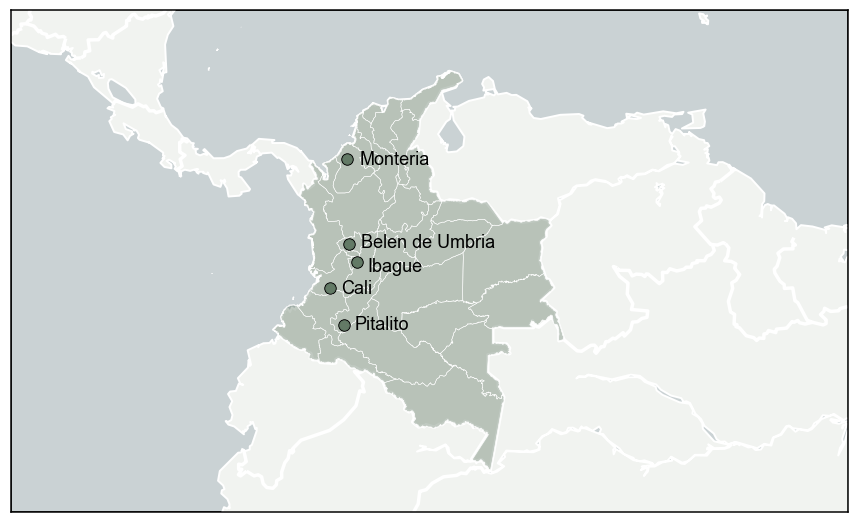

In [126]:
#map plotting time
fig,ax1 = plt.subplots(figsize=(15, 10),facecolor='w')

# bound the portion of the earth that I want to look at with lats and longs for lower left corner and upper right corner
# use low resolution ('l') when scripting so doesn't take a million years to plot. Turn it up higher for manuscript quality fig
# set ax for point scatter.
colombia_map = Basemap(llcrnrlat=-6,urcrnrlat=15,llcrnrlon=-90,urcrnrlon=-55,resolution='l', ax=ax1)
colombia_map.drawmapboundary(fill_color='#CAD2D4', linewidth=1.5) #fill in the ocean, and add box around the map figure
colombia_map.drawcoastlines(color='white', linewidth=2) #draw the coastlines
colombia_map.drawcountries(color='#FFFFFF',linewidth=3.5, linestyle='solid') #draw the country borders
colombia_map.fillcontinents(color ='#F1F3F0') #fill in the landmass color

# make a polygon path for Colombia as a whole so it can be colored differently (0 in shape files references administrative level 0 , or country boundaries)
colombia_map.readshapefile('./gadm36_COL_shp/gadm36_COL_0','country',drawbounds=False)#read in Colombian departmental boundaries from shapefiles
patches = [Polygon(np.array(shape)) for shape in colombia_map.country]  
ax1.add_collection(PatchCollection(patches, facecolor= '#637a66', edgecolor='white', linewidths=1., zorder=2, alpha=0.4))

# add the departmental boundaries, 1 in shapefile references administrative level 1.
colombia_map.readshapefile('./gadm36_COL_shp/gadm36_COL_1','departments',color='#FFFFFF', linewidth=0.5)#read in Colombian departmental boundaries from shapefiles

#add sampling locations to the map given lats and longs of the cities coded above
ax1.scatter(x=longs, y=lats, c='black', alpha=1, zorder=9, marker='o',s=130)
ax1.scatter(x=longs, y=lats, c='#637a66', alpha=1, zorder=10, marker='o',s=90)

### Add CITY LABELING
plt.text(-75.41, 8.74798, 'Monteria', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')
plt.text(-75.35, 5.3,'Belen de Umbria', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')
plt.text(-75.1, 4.3,  'Ibague', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')
plt.text(-76.2, 3.35, 'Cali', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')
plt.text(-75.6, 1.85, 'Pitalito', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')


plt.savefig('../manuscript/figures/genome-locations-figure1.png')
plt.savefig('../manuscript/figures/genome-locations-figure1.pdf')

